In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from json import load
import tifffile
from tqdm import tqdm
from skimage.draw import polygon
from matplotlib import rcParams
from glasbey import create_palette

palette = {
    "green": "#558150",
    "beige": "#F1E2C3",
    "brown": "#A7785A",
    "pink": "#F0D6C2",
    "black": "#0E0E0E",
}

rcParams['font.family'] = 'sans-serif'
rcParams['figure.facecolor'] = "#FFFFFF00"
rcParams['axes.facecolor'] = "#FFFFFF00"
rcParams['legend.framealpha'] = 0.2
rcParams['axes.edgecolor'] = palette["black"]
rcParams['axes.labelcolor'] = palette["black"]
rcParams['xtick.color'] = palette["black"]
rcParams['ytick.color'] = palette["black"]
rcParams['text.color'] = palette["black"]
rcParams['axes.titlecolor'] = palette["black"]

In [42]:
base_path = Path(r"D:\Tracking\NucleiTracking\data\interim\lightsheet\2025_02_06\recon\test3")
raw = tifffile.imread(list(base_path.glob("*.tif"))[-1])

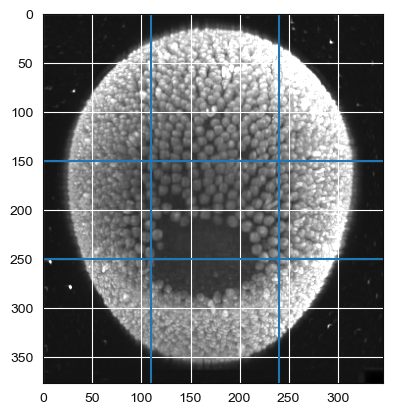

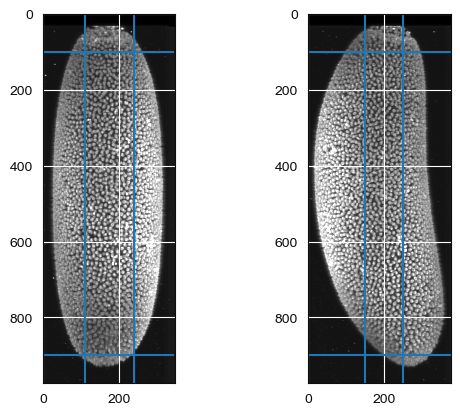

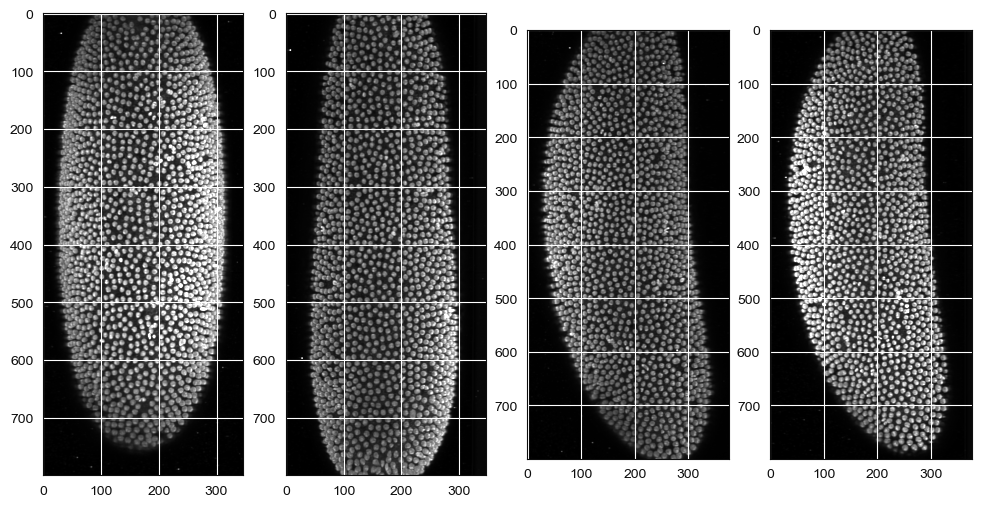

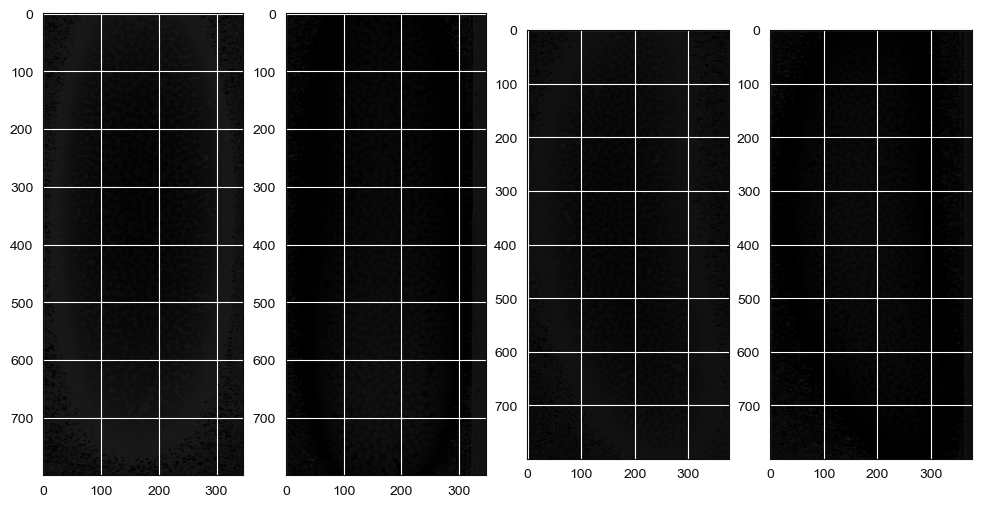

In [43]:
top = 100
bot = 900
left = 110
right = 240
back = 150
front = 250

[110 240 100 900 150 250]

plt.imshow(np.max(raw[:, top:bot], axis=1), "gray", vmax=np.quantile(raw, 0.9999))
plt.vlines([left, right], 0, raw.shape[0]-1)
plt.hlines([front, back], 0, raw.shape[2]-1)
plt.show()
fig, axes = plt.subplots(1, 2)
axes[0].imshow(np.max(raw, axis=0), "gray", vmax=np.quantile(raw, 0.9999))
axes[0].vlines([left, right], 0, raw.shape[1]-1)
axes[0].hlines([top, bot], 0, raw.shape[2]-1)
axes[1].imshow(np.max(raw, axis=2).T, "gray", vmax=np.quantile(raw, 0.9999))
axes[1].vlines([front, back], 0, raw.shape[1]-1)
axes[1].hlines([top, bot], 0, raw.shape[0]-1)
plt.show()
fig, axes = plt.subplots(1, 4, figsize=(12, 6))
axes[0].imshow(np.max(raw[:back, top:bot], axis=0), "gray", vmax=np.quantile(raw, 0.9999))
axes[1].imshow(np.max(raw[front:, top:bot], axis=0), "gray", vmax=np.quantile(raw, 0.9999))
axes[2].imshow(np.max(raw[:, top:bot, :left], axis=2).T, "gray", vmax=np.quantile(raw, 0.9999))
axes[3].imshow(np.max(raw[:, top:bot, right:], axis=2).T, "gray", vmax=np.quantile(raw, 0.9999))
plt.show()

fig, axes = plt.subplots(1, 4, figsize=(12, 6))
axes[0].imshow(np.argmax(raw[:back, top:bot], axis=0), "gray", vmax=np.quantile(raw, 0.9999))
axes[1].imshow(np.argmax(raw[front:, top:bot], axis=0), "gray", vmax=np.quantile(raw, 0.9999))
axes[2].imshow(np.argmax(raw[:, top:bot, :left], axis=2).T, "gray", vmax=np.quantile(raw, 0.9999))
axes[3].imshow(np.argmax(raw[:, top:bot, right:], axis=2).T, "gray", vmax=np.quantile(raw, 0.9999))
plt.show()

In [44]:
test = np.zeros(raw.shape)


z = np.argmax(raw[:back, top:bot], axis=0)
yy, xx = np.meshgrid(top + np.arange(z.shape[0]), np.arange(z.shape[1]), indexing="ij")
test[z.flatten(), yy.flatten(), xx.flatten()] += 1

z = np.argmax(raw[front:, top:bot], axis=0) + front
yy, xx = np.meshgrid(top + np.arange(z.shape[0]), np.arange(z.shape[1]), indexing="ij")
test[z.flatten(), yy.flatten(), xx.flatten()] += 2

x = np.argmax(raw[:, top:bot, :left], axis=2)
zz, yy = np.meshgrid(np.arange(x.shape[0]), top + np.arange(x.shape[1]), indexing="ij")
test[zz.flatten(), yy.flatten(), x.flatten()] += 4

x = np.argmax(raw[:, top:bot, right:], axis=2) + right
zz, yy = np.meshgrid(np.arange(x.shape[0]), top + np.arange(x.shape[1]), indexing="ij")
test[zz.flatten(), yy.flatten(), x.flatten()] += 8

# plt.imshow(np.argmax(test, axis=0))
# plt.show()
# plt.imshow(z)
# plt.show()

import napari

viewer = napari.Viewer()
viewer.add_image(test)
viewer.add_image(raw)
napari.run()

# axes[0].imshow(np.argmax(raw[:back, top:bot], axis=0), "gray", vmax=np.quantile(raw, 0.9999))
# axes[1].imshow(np.argmax(raw[front:, top:bot], axis=0), "gray", vmax=np.quantile(raw, 0.9999))
# axes[2].imshow(np.argmax(raw[:, top:bot, :left], axis=2).T, "gray", vmax=np.quantile(raw, 0.9999))
# axes[3].imshow(np.argmax(raw[:, top:bot, right:], axis=2).T, "gray", vmax=np.quantile(raw, 0.9999))

In [25]:
from scipy.ndimage import rotate

rotated = rotate(raw, 45, (0, 2))

(512, 974, 512)


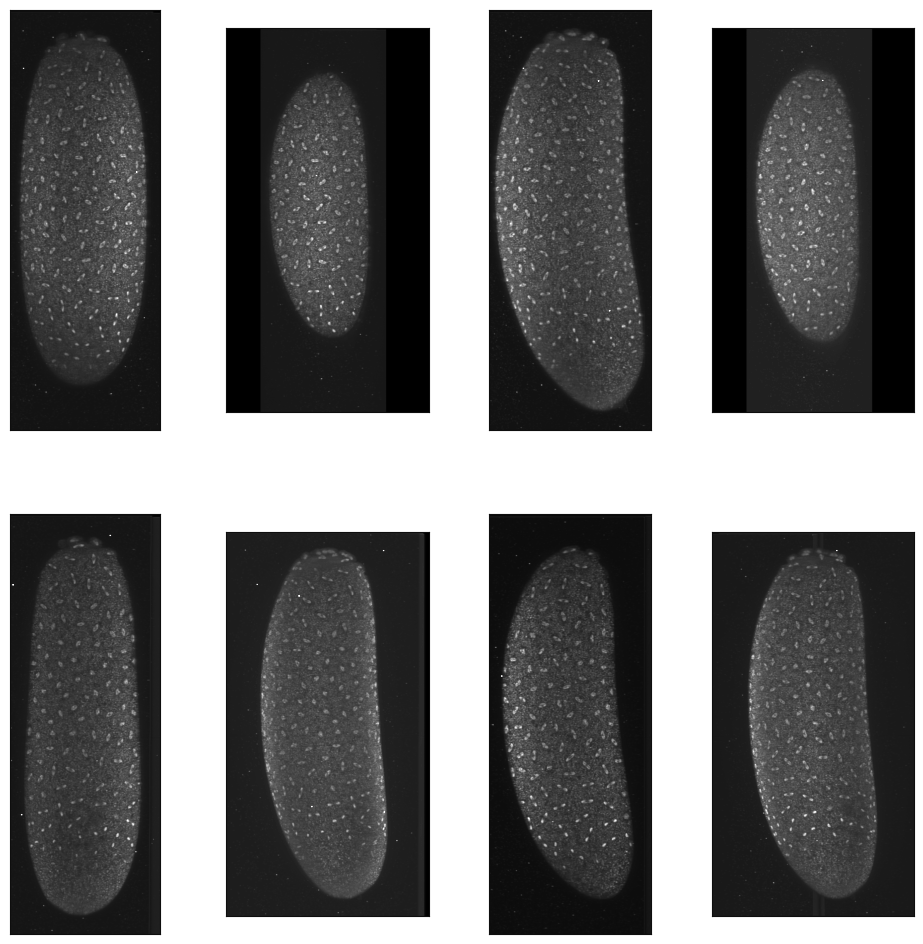

In [38]:
fig, axes = plt.subplots(2, 4, figsize=(12, 12))
axes = axes.flatten()

print(rotated.shape)

def imshow(ax, data):
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(data, "gray", vmax=np.quantile(data, 0.9999))

imshow(axes[0], np.max(raw[:160], axis=0)) 
imshow(axes[1], np.max(rotated[:160], axis=0)) 
imshow(axes[2], np.max(raw[:, :, :160], axis=2).T) 
imshow(axes[3], np.max(rotated[:, :, :160], axis=2).T) 
imshow(axes[4], np.max(raw[240:], axis=0)) 
imshow(axes[5], np.max(rotated[240:], axis=0)) 
imshow(axes[6], np.max(raw[:, :, 240:], axis=2).T) 
imshow(axes[7], np.max(rotated[:, :, 240:], axis=2).T) 

plt.show()

# plt.imshow(np.max(rotated, axis=0), "gray", vmax=np.quantile(raw, 0.9999))